In [1]:
import json
import os 
from os import path
import glob
import numpy as np

In [2]:
train_file = "/home/shtoshni/Research/litbank_coref/data/litbank/overlap/1/train.512.jsonlines"

In [10]:
doc_len_list = []
num_ment_list = []
num_sents = []
ment_to_len_frac_list = []
span_width_list = []

num_singleton_ments = 0
num_other_ments = 0

with open(train_file) as f:
    for line in f:
        instance = json.loads(line.strip())
        doc_len = len(instance["subtoken_map"])
        
        doc_len_list.append(doc_len)
        
        num_sents.append(len(instance["sentences"]))
        num_ments = sum([len(cluster) for cluster in instance["clusters"]])
        
        num_singleton_ments += sum([len(cluster) for cluster in instance["clusters"] if len(cluster) == 1])
        num_other_ments += sum([len(cluster) for cluster in instance["clusters"] if len(cluster) > 1])
        
        
        for cluster in instance["clusters"]:
            for ment_start, ment_end in cluster:
                span_width_list.append(ment_end - ment_start + 1)
        
        num_ment_list.append(num_ments)
        
        ment_to_len_frac_list.append(num_ments/doc_len)

print(num_singleton_ments, num_other_ments)

4502 18670


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

# Set Matplotlib Parameters
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='gray', edgecolor='k', labelsize=16)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


def initialize_bar_plot():
    fig, ax = plt.subplots(1)
    
    # Get rid of grids and ticks
    ax.grid(b=False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Remove the two sides of the bounding box
    spines_to_remove = ['top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)
        
    return fig, ax

Text(0.5, 0, '\\# of mentions to doc len ratio ')

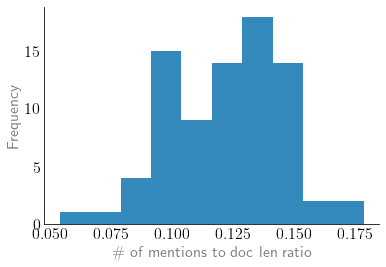

In [5]:
fig, ax = initialize_bar_plot()
plt.hist(ment_to_len_frac_list)
plt.ylabel('Frequency')
plt.xlabel('\# of mentions to doc len ratio ')

Text(0.5, 0, '\\# of sents ')

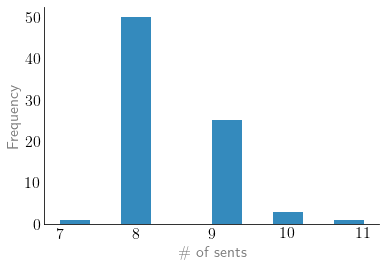

In [6]:
fig, ax = initialize_bar_plot()
plt.hist(num_sents)
plt.ylabel('Frequency')
plt.xlabel('\# of sents ')

Text(0.5, 0, 'Span width')

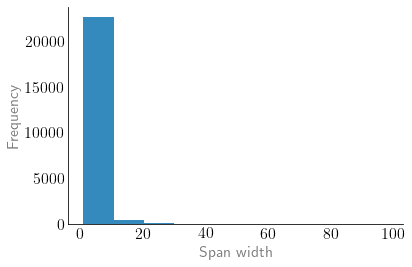

In [7]:
fig, ax = initialize_bar_plot()
plt.hist(span_width_list)
plt.ylabel('Frequency')
plt.xlabel('Span width')

In [8]:
np.sum(np.asarray(span_width_list) >= 25)

121

### Global numbers

In [9]:
print("# of subtokens in train set:", sum(doc_len_list))
print("# of ments in train set:", sum(num_ment_list))

# of subtokens in train set: 190142
# of ments in train set: 23172
